<a href="https://colab.research.google.com/github/JescapsAntwi/Linear-Regression/blob/master/Midsem_Project_custom_multiple_lr_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The insurance dataset provides the insurance premium charges given various features i.e age, sex, bmi, no of children, region the person hails from(represented with numbers)and whether the person smokes or not(1 for yes and 0 for no). As a data scientist, you have been hired to implement a custom linear regression algorithm to assist the insurance company calcuate the correct charges for new cliens given their features.
1. Do a little data exploration using the pandas library (5 marks)
2. Preprocess your data into the necessary independent and dependent variables(5 marks)
3. Define your hypothesis function (5 marks)
4. Define your cost function(10)
5. Define your gradient descent function(10 marks)
6. Run a training making choices of your learning rate and number of iterations(10 marks)
7. What are your final values for your learning rate, number of iterations, parameters(w and b) and lowest cost? (5 marks)
8. Visualizations/plots of data, hypothesis and final training (10 marks)

Total 60 marks

In [5]:
#importing the necessary libraries
import pandas as pan
import numpy as num
import matplotlib.pyplot as mat
import seaborn as sea
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#setting the style for better visualization
mat.style.use('seaborn-v0_8-whitegrid')
sea.set_palette('deep')

#read the insurance dataset
insurance_data = pan.read_csv('insurance-1.csv')

DATA EXPLORATION

Basic Information of the Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       348 non-null    int64  
 1   sex       348 non-null    int64  
 2   bmi       348 non-null    float64
 3   children  348 non-null    int64  
 4   smoker    348 non-null    int64  
 5   region    348 non-null    int64  
 6   charges   348 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 19.2 KB
None

First 5 rows of the dataset:
   age  sex     bmi  children  smoker  region      charges
0   19    0  27.900         0       1       3  16884.92400
1   18    1  33.770         1       0       2   1725.55230
2   28    1  33.000         3       0       2   4449.46200
3   33    1  22.705         0       0       1  21984.47061
4   32    1  28.880         0       0       1   3866.85520

Missing values in each column:
age         0
sex     

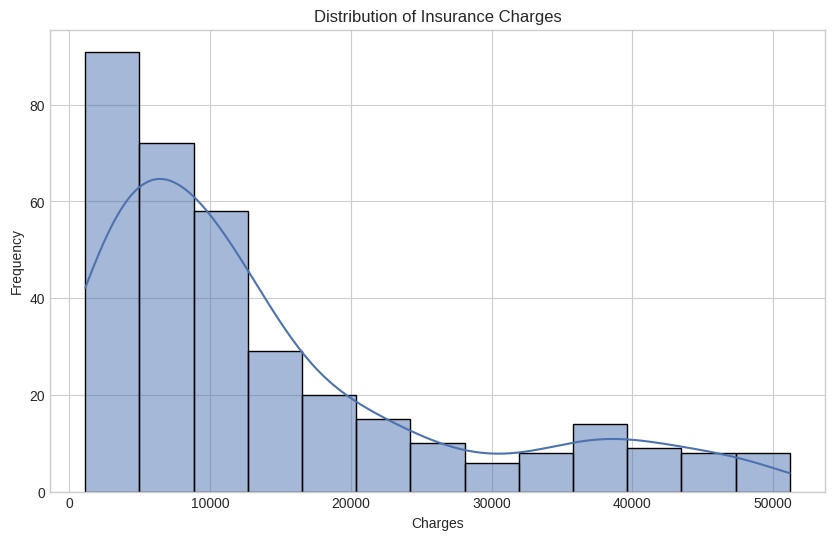

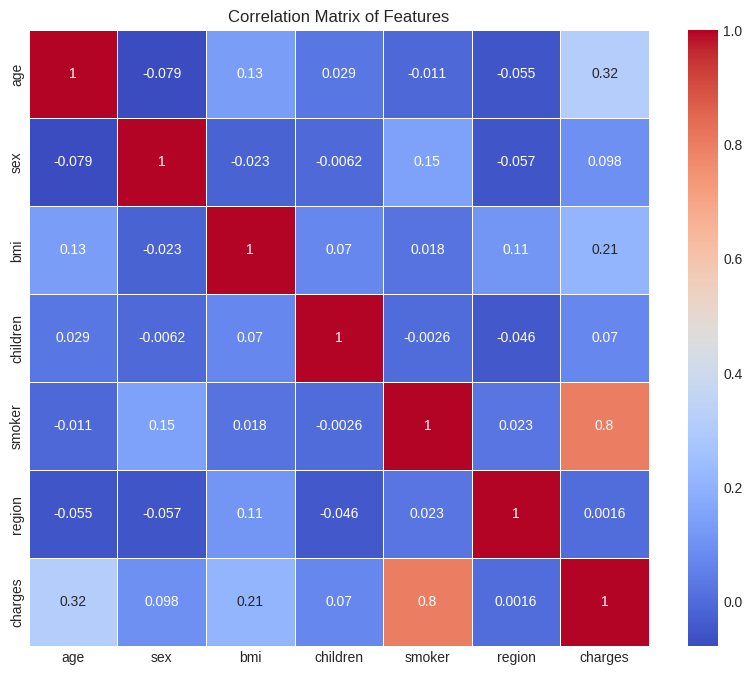

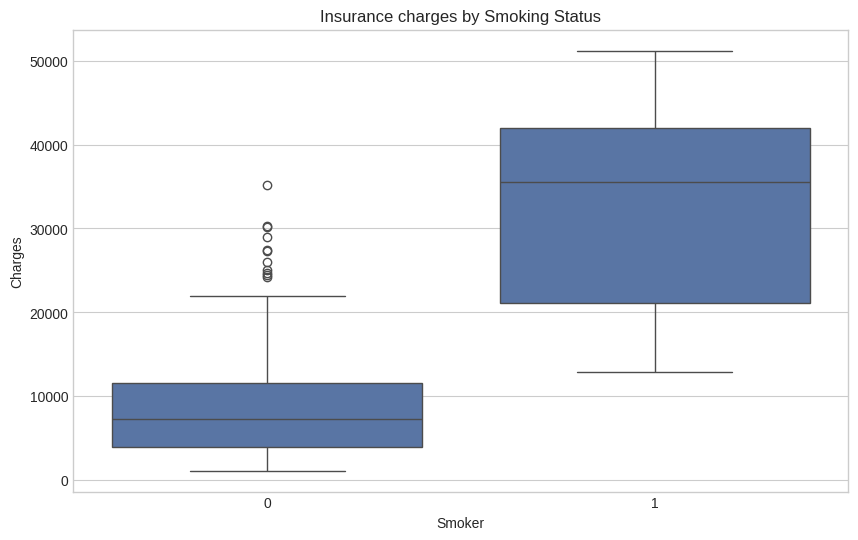

Text(0, 0.5, 'Charges')

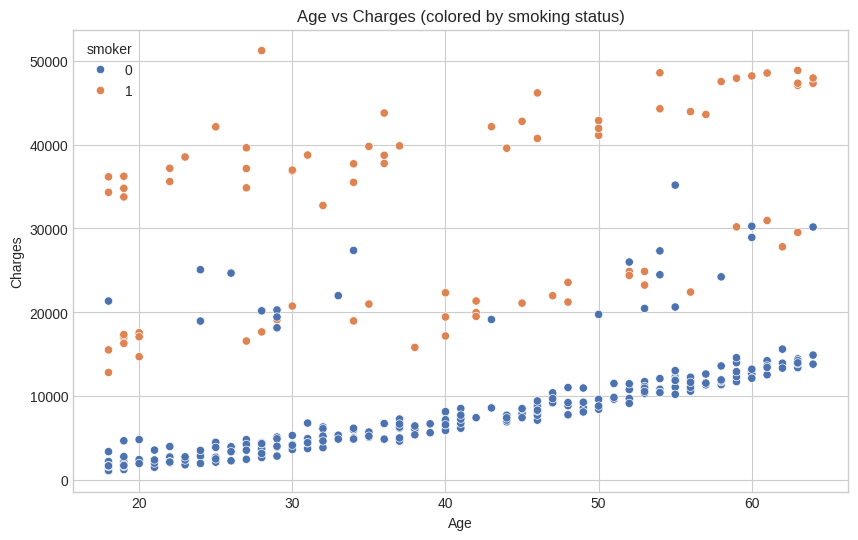

In [15]:
#1. Data Exploration
print("=" * 50)
print("DATA EXPLORATION")
print("=" * 50)

#I'll first look at the basic information of the dataset
print("\nBasic Information of the Dataset")
print(insurance_data.info())

#Displaying the first few rows of the dataset
print("\nFirst 5 rows of the dataset:")
print(insurance_data.head())

#For the next exploration, i'll check for missing values
print("\nMissing values in each column:")
print(insurance_data.isnull().sum())

#Calculating statistical summaries
print("\nStatistical Summary of the Dataset:")
print(insurance_data.describe())

#Analyzing the distribution of our target variable (charges)
mat.figure(figsize=(10, 6))
sea.histplot(data=insurance_data, x='charges', kde=True)
mat.title('Distribution of Insurance Charges')
mat.xlabel('Charges')
mat.ylabel('Frequency')
mat.show()

#Checking correlation between features
mat.figure(figsize=(10, 8))
correlation_matrix = insurance_data.corr()
sea.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
mat.title('Correlation Matrix of Features')
mat.show()

#Exploring how different categorical variables affect charges
#Boxplot for smoker vs charges
mat.figure(figsize=(10, 6))
sea.boxplot(x='smoker', y='charges', data=insurance_data)
mat.title('Insurance charges by Smoking Status')
mat.xlabel('Smoker')
mat.ylabel('Charges')
mat.show()

#Scatterplot of age vs charges with smoker status
mat.figure(figsize=(10, 6))
sea.scatterplot(x='age', y='charges', hue='smoker', data=insurance_data)
mat.title('Age vs Charges (colored by smoking status)')
mat.xlabel('Age')
mat.ylabel('Charges')


In [21]:
#2. Data PreProcessing
print("\n" + "=" * 50)
print("DATA PREPROCESSING")
print("=" * 50)

#Create X (features) and y(target)
X = insurance_data.drop(columns=['charges'])
y = insurance_data['charges']

#In the insurance dataset, sex, smoker, and region might be categorical
# But they are represented with numbers, so i will keep them as they are
print("\nFeatures (X) shape:", X.shape)
print("Target (y) shape:", y.shape)

#Feature scaling for better convergence of gradient descent
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Splitting the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("\nTraining set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])


DATA PREPROCESSING

Features (X) shape: (348, 6)
Target (y) shape: (348,)

Training set size: 278
Testing set size: 70


In [28]:
#3. Defining Hypothesis Function
print("\n" + "=" * 50)
print("DEFINING HYPOTHESIS FUNCTION")
print("=" * 50)

def hypothesis(X, w, b):
    return num.dot(X, w) + b


DEFINING HYPOTHESIS FUNCTION


In [24]:
#4. Define Cost Function
print("\n" + "=" * 50)
print("DEFINING COST FUNCTION")
print("=" * 50)

def compute_cost(X, y, w, b):
  m = X.shape[0] #Number of training examples
  predictions = hypothesis(X, w, b)
  cost = (1/2*m) * num.sum((predictions - y)**2)
  return cost


DEFINING COST FUNCTION


In [26]:
#5. Define Gradient Descent Function
def gradient_descent(X, y, w_init, b_init, alpha, num_iterations):
    m = X.shape[0] #Number of training examples
    n = X.shape[1] #Number of features

    #Initializing the parameters
    w = w_init
    b = b_init
    costs = []

    #Gradient descent iterations
    for i in range(num_iterations):
      #Computing predictions
      predictions = hypothesis(X, w, b)

      #Computing gradients
      dj_dw = (1 / m) * num.dot(X.T, (predictions - y))
      dj_db = (1/m) * num.sum(predictions - y)

      #Updating parameters
      w = w - alpha * dj_dw
      b = b - alpha * dj_db

      #Save cost every 100 iterations
      if i % 100 == 0:
        cost = compute_cost(X, y, w, b)
        costs.append(cost)
        print(f"Iteration {i}: Cost = {cost}")

    return w, b, costs


MODEL TRAINING

Training with learning rate: 0.01
Iteration 0: Cost = 12728824045936.049
Iteration 100: Cost = 3011675544973.158
Iteration 200: Cost = 1638000727910.1875
Iteration 300: Cost = 1442061368971.836
Iteration 400: Cost = 1413877080286.1682
Iteration 500: Cost = 1409790415265.5066
Iteration 600: Cost = 1409193238342.4714
Iteration 700: Cost = 1409105302102.9382
Iteration 800: Cost = 1409092252878.0247
Iteration 900: Cost = 1409090301076.2039

Training with learning rate: 0.03
Iteration 0: Cost = 12287395748988.576
Iteration 100: Cost = 1439032833566.9216
Iteration 200: Cost = 1409178833986.4355
Iteration 300: Cost = 1409090237811.2644
Iteration 400: Cost = 1409089954796.6072
Iteration 500: Cost = 1409089953813.5151
Iteration 600: Cost = 1409089953809.7317
Iteration 700: Cost = 1409089953809.7153
Iteration 800: Cost = 1409089953809.7153
Iteration 900: Cost = 1409089953809.7153

Training with learning rate: 0.1
Iteration 0: Cost = 10811710150766.848
Iteration 100: Cost = 14090

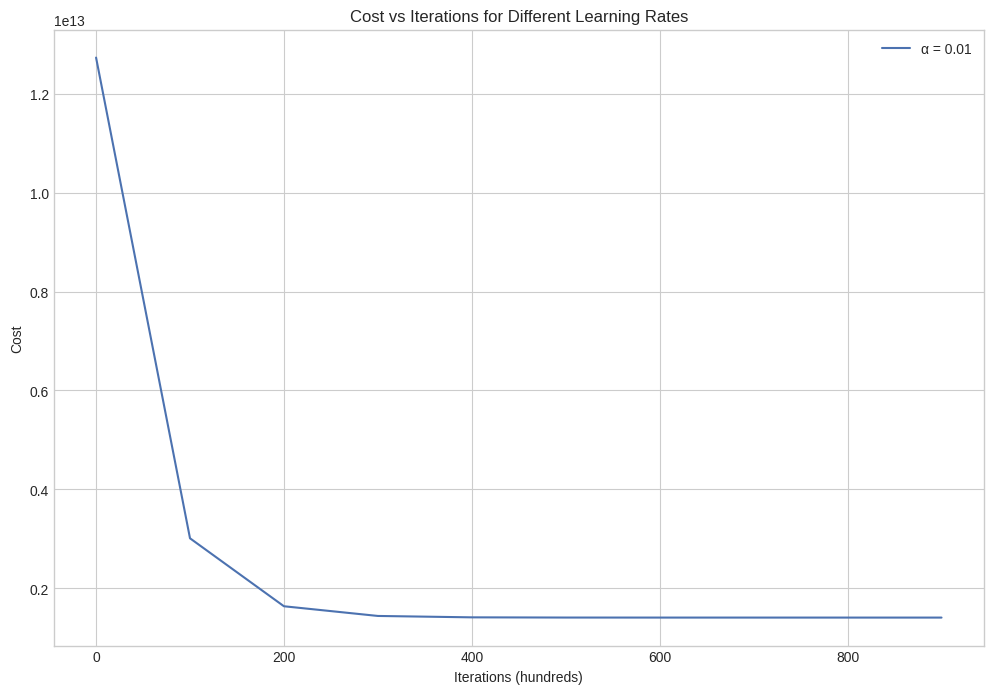

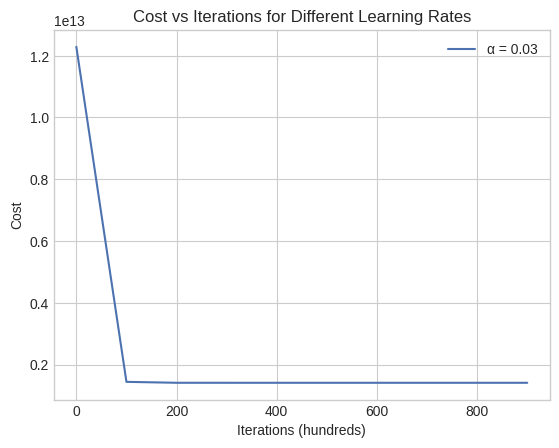

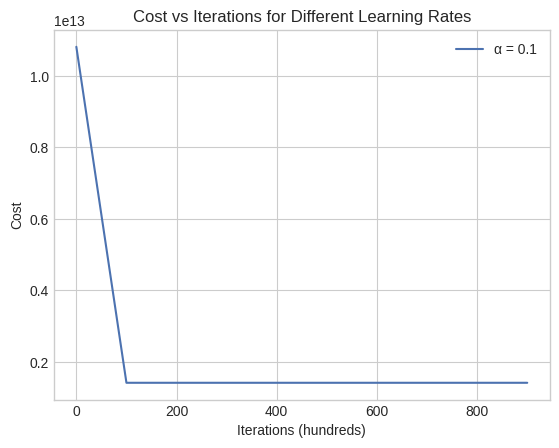

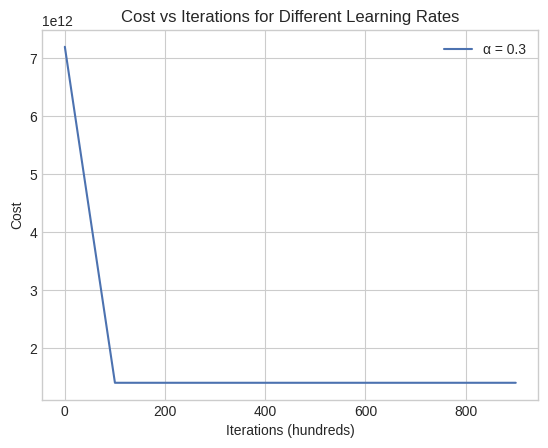

In [30]:
#6. Model Training with Multiple Learning rates
print("\n" + "=" * 50)
print("MODEL TRAINING")
print("=" * 50)

#Initializing parameters
initial_w = num.zeros(X_train.shape[1])
initial_b = 0.0

#Defining different learning rates to test
learning_rates = [0.01, 0.03, 0.1, 0.3]
iterations = 1000
results = {}

#Training the model with different learning rates
for alpha in learning_rates:
  print(f"\nTraining with learning rate: {alpha}")
  w_final, b_final, costs = gradient_descent(X_train, y_train, initial_w, initial_b, alpha, iterations)

  #Storing results
  results[alpha] = {
      'w_final': w_final,
      'b_final': b_final,
      'costs': costs
  }

#Plotting cost vs iterations for different learning rates
mat.figure(figsize=(12, 8))
for alpha, result in results.items():
  mat.plot(range(0, iterations, 100), result['costs'], label=f'α = {alpha}')
  mat.xlabel('Iterations (hundreds)')
  mat.ylabel('Cost')
  mat.title('Cost vs Iterations for Different Learning Rates')
  mat.legend()
  mat.show()



In [32]:
#7. Determine the best learning rate based on final cost
best_alpha = min(results.keys(), key=lambda alpha: results[alpha]['costs'][-1])
best_w = results[best_alpha]['w_final']
best_b = results[best_alpha]['b_final']
lowest_cost = results[best_alpha]['costs'][-1]

print("\n" + "=" * 50)
print("FINAL RESULTS")
print("=" * 50)

print(f"\nBest learning rate (α): {best_alpha}")
print(f"Number of Iterations: {iterations}")
print(f"Final Weights (w): {best_w}")
print(f"Final Bias (b): {best_b}")
print(f"Lowest Cost: {lowest_cost}")


FINAL RESULTS

Best learning rate (α): 0.03
Number of Iterations: 1000
Final Weights (w): [3812.2421564   -21.42696015 2066.39789043  727.20265897 9815.68757869
 -322.79084906]
Final Bias (b): 13832.203379388538
Lowest Cost: 1409089953809.7153



VISUALIZATIONS

R-squared on test set: 0.791811188718144


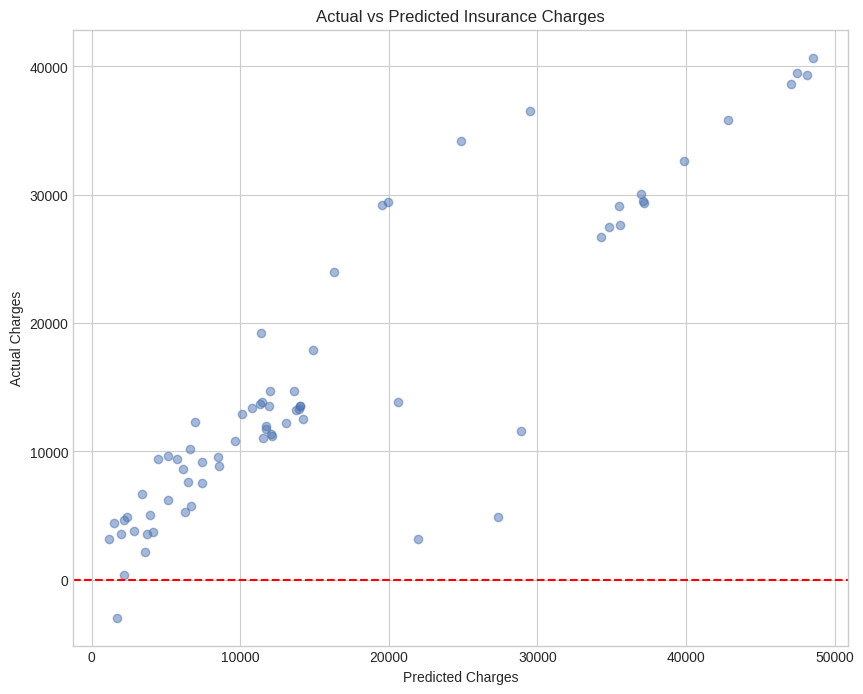

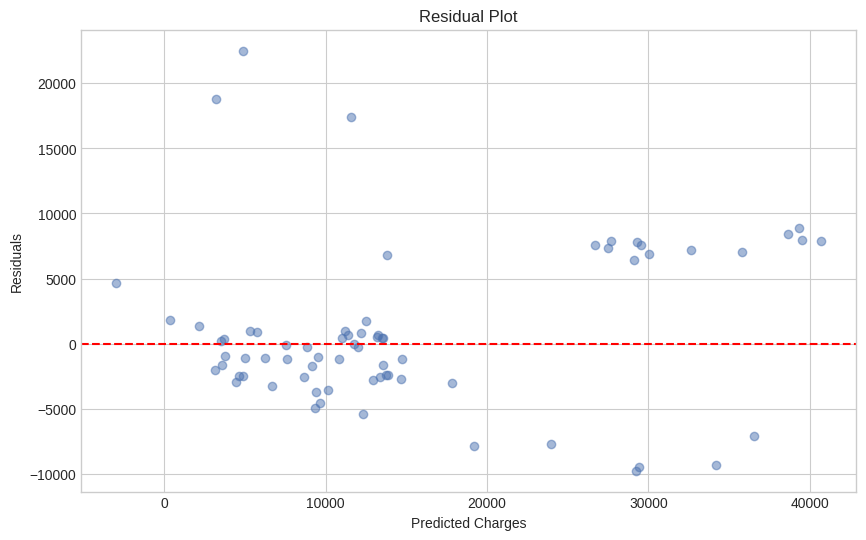

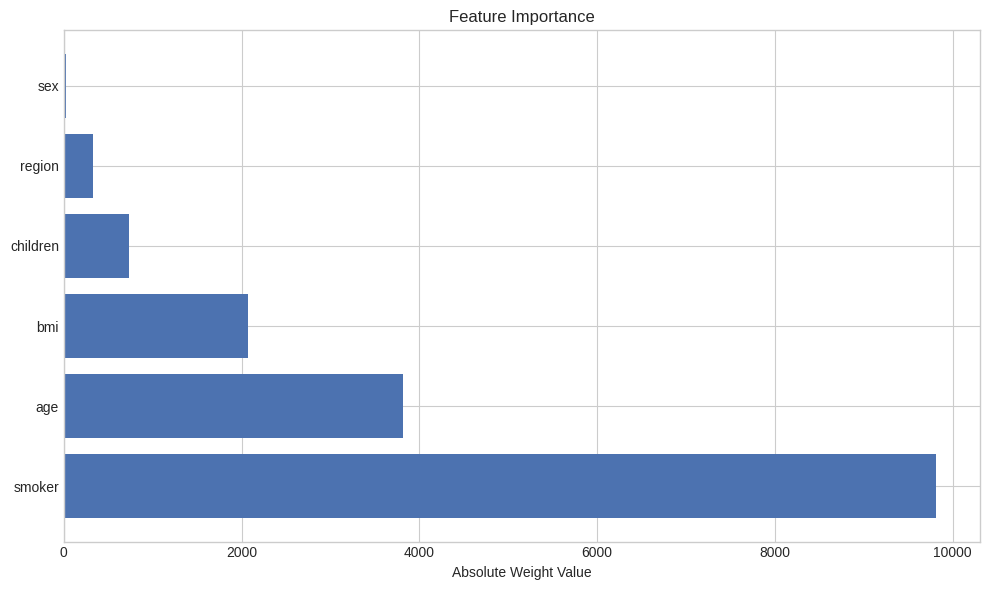


All tasks completed successfully!


In [37]:
#8. Visualizations
print("\n" + "=" * 50)
print("VISUALIZATIONS")
print("=" * 50)

#Making predictions on the test set
y_pred = hypothesis(X_test, best_w, best_b)

#Calculate R-squared for evaluation
SS_res = num.sum((y_test - y_pred)**2)
SS_tot = num.sum((y_test - num.mean(y_test))**2)
r_squared = 1 - ((SS_res / SS_tot))
print(f"\nR-squared on test set: {r_squared}")

#Plotting actual vs predicted values
mat.figure(figsize=(10, 8))
mat.scatter(y_test, y_pred, alpha=0.5)
mat.axhline(y=0, color='r', linestyle='--')
mat.xlabel('Predicted Charges')
mat.ylabel('Actual Charges')
mat.title('Actual vs Predicted Insurance Charges')
mat.grid(True)
mat.show()

#Plotting residuals
residuals = y_test - y_pred
mat.figure(figsize=(10, 6))
mat.scatter(y_pred, residuals, alpha=0.5)
mat.axhline(y=0, color='r', linestyle='--')
mat.xlabel('Predicted Charges')
mat.ylabel('Residuals')
mat.title('Residual Plot')
mat.grid(True)
mat.show()

#Feature importance plot (this is based on the absolute values of weights)
feature_names = X.columns
feature_importance = num.abs(best_w)
feature_importance_dict = dict(zip(feature_names, feature_importance))
sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

mat.figure(figsize=(10, 6))
features, importances = zip(*sorted_features)
mat.barh(features, importances)
mat.xlabel('Absolute Weight Value')
mat.title('Feature Importance')
mat.tight_layout()
mat.show()

print("\nAll tasks completed successfully!")